In [36]:
#LED CALIBRATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def get_inten(fn):
    print(fn)
    with open(fn) as f:
        lines = f.readlines()
    start = lines.index('>>>>>Begin Spectral Data<<<<<\n')+1
    data = lines[start:]
    lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
    inten = np.array([(data[i][data[i].index("\t")+1:data[i].index("\n")]) for i in range(len(data))])
    lam = lam[np.where(inten!='')].astype(np.float)
    inten = (inten[np.where(inten!='')].astype(np.float))
    plt.plot(lam, inten, 'r.')
    plt.show()

    index = np.where(inten == max(inten))[0][0]
    print(index)
    erri = np.std(inten[index-2:index+2])
    errl = np.std(lam[np.where(abs(inten)>0.5*max(inten))])
    print(erri, errl)
    return lam[index], inten[index], errl, erri

In [32]:
def wchisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)

def mxb_simple(x, y, xerr, yerr):
    N=len(x) # Find number of datapoints
    
    print("Multiplying!")
    print(x.multiply(x))
    sum_x=x.sum() #sum of x datapoints
    sum_y=y.sum() #sum of y datapoints
    sum_sxy=sum_x*sum_y #Breaking the equation up into parts to make it easier. This one finds the sum of x times the sum of y.
    delta = N*x.multiply(x).sum()-(x.sum())**2 #Equation from lab manual.
    m = (N*(x.multiply(y).sum())-x.sum()*y.sum())/delta #Equation from lab manual.
    c = (((x.multiply(x).sum())*y.sum())-(x.sum()*(x.multiply(y).sum())))/delta #Equation from lab manual.
    y_bf=m*x+c #Find the predicted datapoints, with a y intercept!
    
    #ERRORS
    err=((y-m*x-c).multiply(y-m*x-x).sum()/(N-2))**0.5 #Equation from lab manual.
    err_c=round(err*((x.multiply(x).sum()/delta)**0.5), 8) #Equation from lab manual.
    err_m=round(err*((N/delta)**0.5), 8) # Equation from lab manual.

    chi2 = wchisq(y_bf, y, yerr)
    print(chi2)

    print("m: ", m)
    print("b: ", c)
    
    return m, c, chi2, err_m, err_c, y_bf

red led calibration.txt


/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_1711/1430627043.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lam = lam[np.where(inten!='')].astype(np.float)
/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_1711/1430627043.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inten = (inten[np.where(inten!='')].a

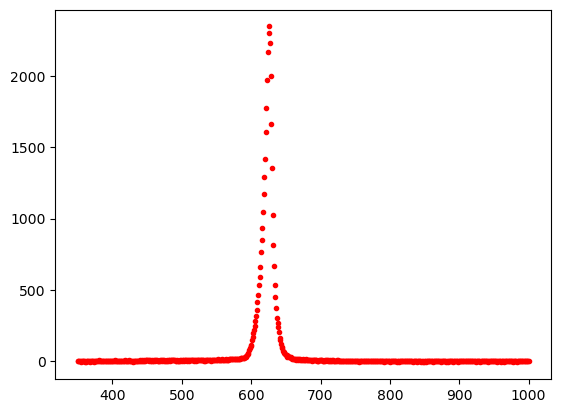

276
67.43193605406857 3.452052529534663
blue led calibration.txt


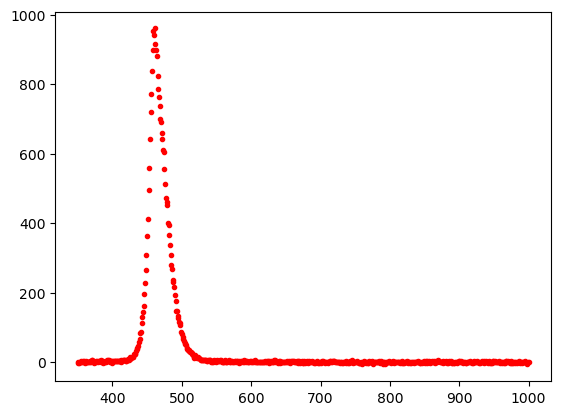

111
16.497095767134297 7.211102550927978
calibration with green led.txt


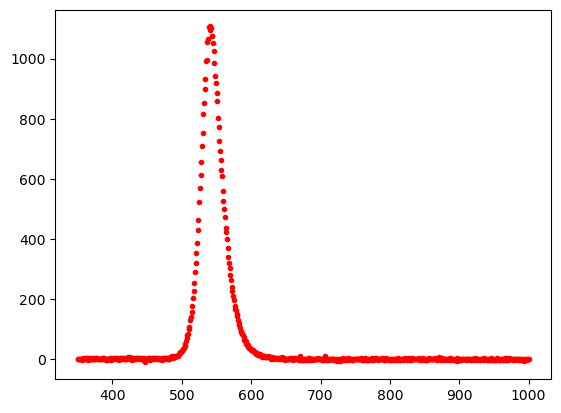

191
4.681871287209907 9.810708435174291


In [11]:
rlam, rinten, rerrl, rerri = get_inten("red led calibration.txt")
blam, binten, berrl, berri = get_inten("blue led calibration.txt")
glam, ginten, gerrl, gerri = get_inten("calibration with green led.txt")

Text(0, 0.5, 'Reported Peak Wavelenegth (nm)')

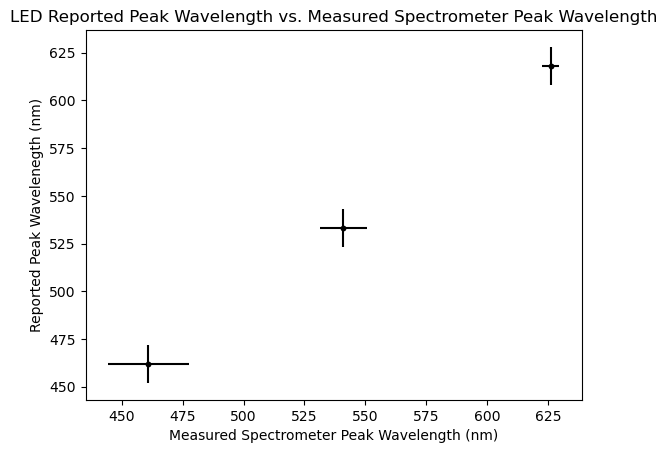

In [30]:
lams = [rlam, glam, blam]
errlams = [rerrl, gerrl, berri]
ledlams = [618, 533, 462]
errledlams = [10, 10, 10]


plt.errorbar(lams, ledlams, xerr=errlams, yerr=errledlams, fmt="k.")
plt.plot(lams, ledlams, "k.")
plt.title("LED Reported Peak Wavelength vs. Measured Spectrometer Peak Wavelength")
plt.xlabel("Measured Spectrometer Peak Wavelength (nm)")
plt.ylabel("Reported Peak Wavelength (nm)")



In [39]:
x = pd.Series(lams)
y = pd.Series(ledlams)
xerr = pd.Series(errlams)
yerr = pd.Series(errledlams)
N = 3

m, c, chi2, err_m, err_c, y_bf = mxb_simple(x, y, xerr=xerr, yerr=yerr)

Multiplying!
0    391876.0
1    292681.0
2    212521.0
dtype: float64
0.14326193390452846
m:  0.9460220318237454
b:  24.29204406364749


CHI2:  0.027029797012354438


Text(450, 575, 'Best Fit Equation:\ny=0.946x + 24.292\nError (on m): 0.032\nError (on c): 17.737 \nχ2: 0.027')

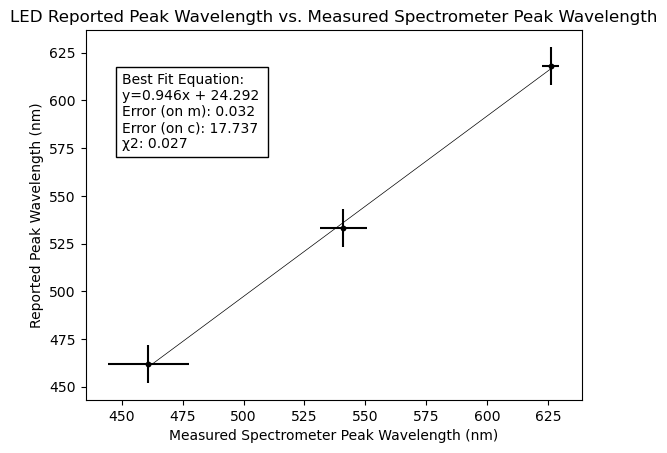

In [51]:
plt.plot(x,y_bf, c="Black", linewidth=0.5) #Plot the line of best fit on top.

plt.errorbar(lams, ledlams, xerr=errlams, yerr=errledlams, fmt="k.")
plt.plot(lams, ledlams, "k.")
plt.title("LED Reported Peak Wavelength vs. Measured Spectrometer Peak Wavelength")
plt.xlabel("Measured Spectrometer Peak Wavelength (nm)")
plt.ylabel("Reported Peak Wavelength (nm)")


variance = ((y-np.average(y))**2).sum()/(N-1)
chi2 = ((y-y_bf)**2).sum()/variance
#chi2 = wchisq(y_bf, y, yerr)/(N-1)

y_bf = m*x + c

chi2 = (((y_bf - y)**2)/y).sum()

print("CHI2: ", chi2)
plt.text(450, 575,"Best Fit Equation:\ny="+str(round(m,3))+"x + "+str(round(c,3))+"\nError (on m): "+str(round(err_m, 3))+"\nError (on c): "+str(round(err_c, 3))+" \n"+"χ2: " + str(round(chi2, 3)), fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))

